# Used dataset – Student Performance Data Set 
#### Research question
Get valuable information about dataset, provide visualization results and make a machine learning model that will predict the average grade on tests based on values of other attributes
#### Used software
In this project I am going to use Anaconda package with Python 3.6.4 and all other modules (seaborn, pandas, sklearn, numpy, matplotlib) 
#### Source:
Paulo Cortez, University of Minho, GuimarÃ£es, Portugal, http://www3.dsi.uminho.pt/pcortez 
#### Dataset information 
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).
#### Attribute information
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 
* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* __traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)__
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* __failures - number of past class failures (numeric: n if 1<=n<3, else 4)__
* __schoolsup - extra educational support (binary: yes or no)__
* __famsup - family educational support (binary: yes or no)__
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* __activities - extra-curricular activities (binary: yes or no)__
* nursery - attended nursery school (binary: yes or no)
* __higher - wants to take higher education (binary: yes or no)__
* __internet - Internet access at home (binary: yes or no)__
* __romantic - with a romantic relationship (binary: yes or no)__
* __famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)__
* __freetime - free time after school (numeric: from 1 - very low to 5 - very high)__
* __goout - going out with friends (numeric: from 1 - very low to 5 - very high)__
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* __health - current health status (numeric: from 1 - very bad to 5 - very good)__
* __absences - number of school absences (numeric: from 0 to 93)__
* These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)  
G2 - second period grade (numeric: from 0 to 20)  
G3 - final grade (numeric: from 0 to 20, output target)  

### Relevant papers
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th Future BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. [Available here](http://www3.dsi.uminho.pt/pcortez/student.pdf)


#### Importing Python modules we will work with

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
sns.set_color_codes("pastel")
%matplotlib inline

Reading **student-mat.csv** file as pandas DataFrame

In [2]:
data = pd.read_csv('student-mat.csv')

#### Showing first five rows of the table to understand how dataframe looks like

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


To understand the bounds, average, dispersion and other properties of data we call **describe** method

In [4]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### We can also get information about every feature in dataframe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

Next we want to find how each feature correlates with other.   
For this purpose **heatmap** method by Seaborn library is perfect visualization choice – it represents a color-encoded matrix which is easy to understand for human being.

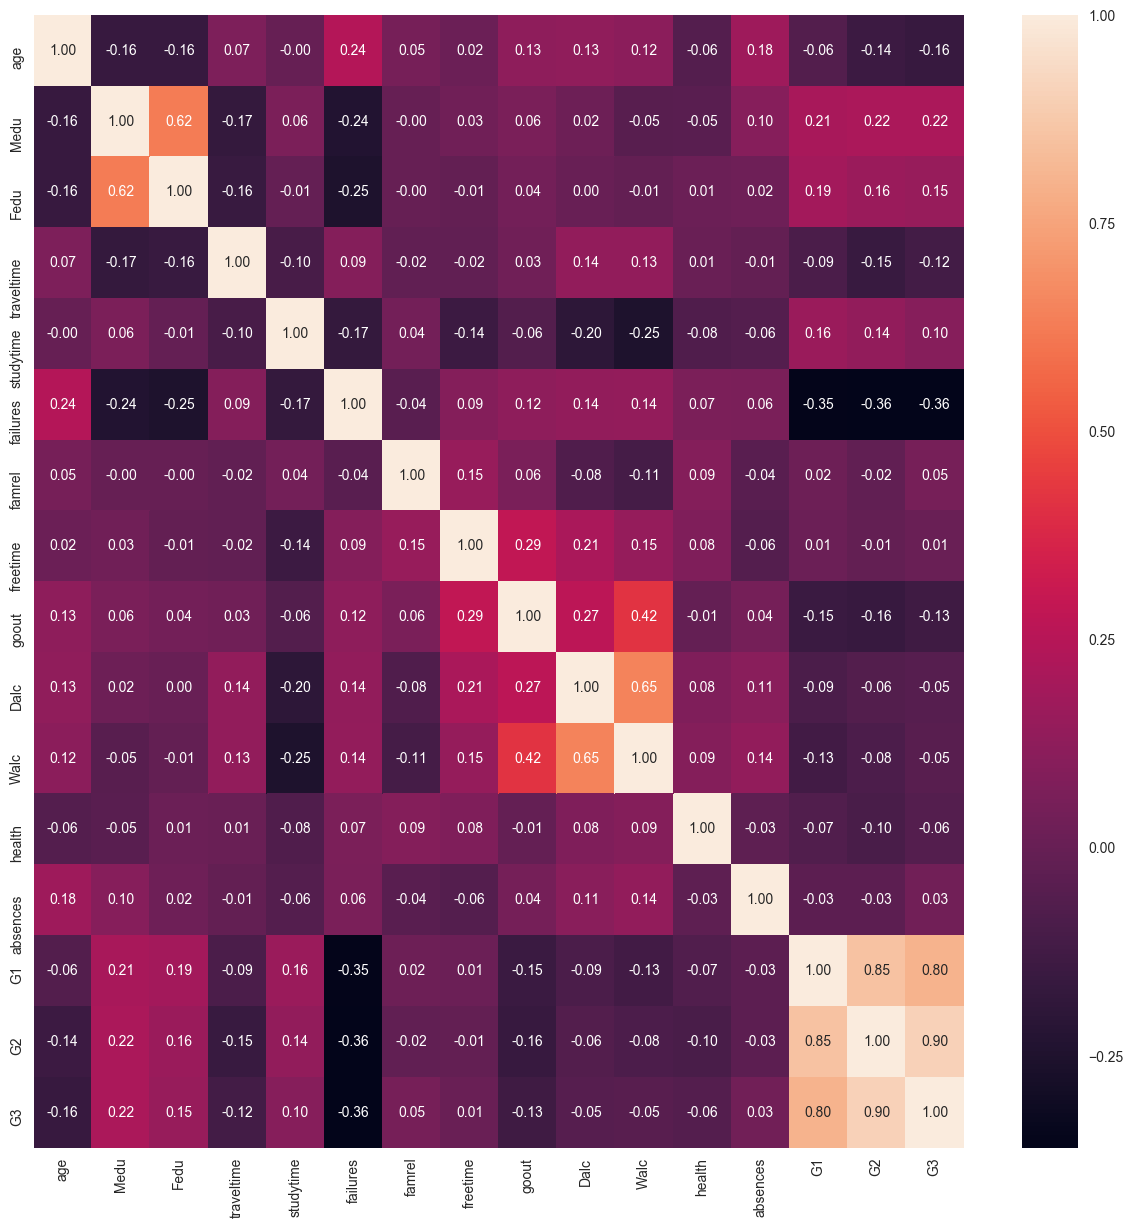

In [6]:
plt.figure(figsize=(15,15), dpi=100)
sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)

#### We can see plenty of correlations:  
First of all (looking at right down corner of heatmap), we can see that student's performance on each test is highly correlated with performance on other tests. This is obvious.  
Then, we can see that **Dalc** and **Walc** features are also in dependance. That is also obvious. Moreover, the more times people go out, the more likely they consume alcohol.  
It is also interesting that mother's and father's education level is highly correlated.



In [7]:
data['MaxAlc'] = data[["Dalc", "Walc"]].max(axis=1)

In [8]:
data['AvgGrade'] = data[["G1", "G2", "G3"]].mean(axis=1)

## Some Visualizations

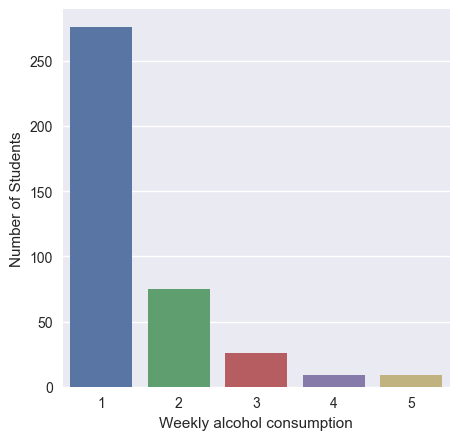

In [9]:
list_dens = []
plt.figure(figsize=(5,5), dpi=100)
for i in range(1, 6):
    list_dens.append(len(data[data.Dalc == i]))
ax = sns.barplot(x = [1,2,3,4,5], y = list_dens)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

### Getting info about sex distribution. Pie chart is perfect choice

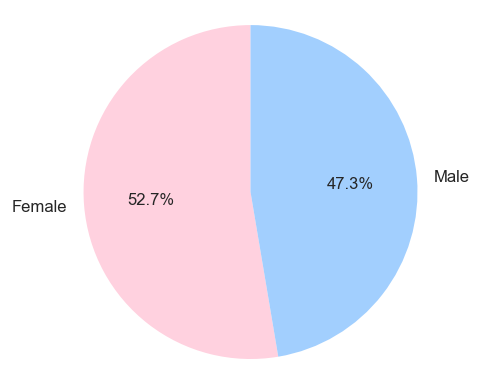

In [10]:
f, ax = plt.subplots(figsize=(4, 4), dpi=120)
plt.pie(data['sex'].value_counts(), 
        labels=['Female', 'Male'], colors=['#ffd1df', '#a2cffe'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

#### Age distribution

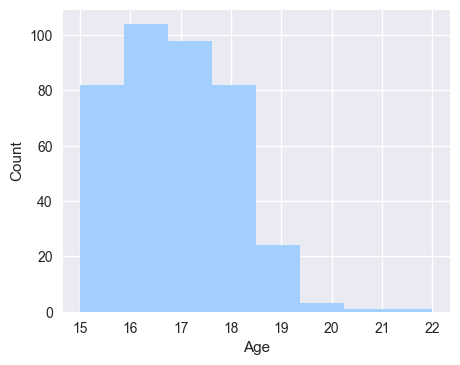

In [11]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
sns.distplot(data['age'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Age")

#### Showing study time

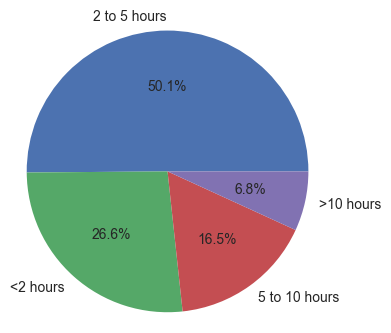

In [12]:
f, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.pie(data['studytime'].value_counts().tolist(), 
        labels=['2 to 5 hours', '<2 hours', '5 to 10 hours', '>10 hours'], 
        autopct='%1.1f%%', startangle=0)
axis = plt.axis('equal')

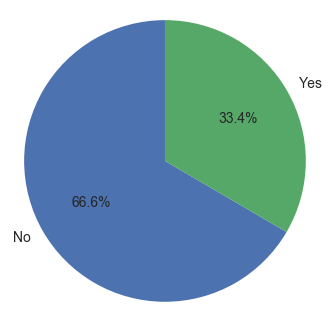

In [13]:
f, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.pie(data['romantic'].value_counts().tolist(), 
        labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

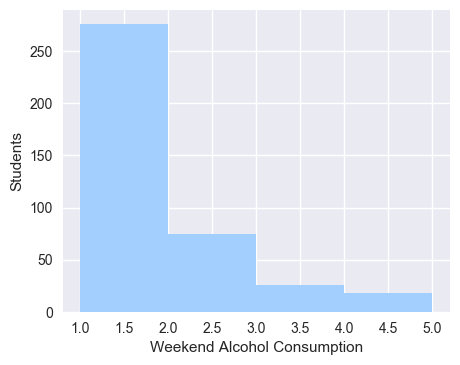

In [14]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
sns.distplot(data['Dalc'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=4)
ax = ax.set(ylabel="Students", xlabel="Weekend Alcohol Consumption")

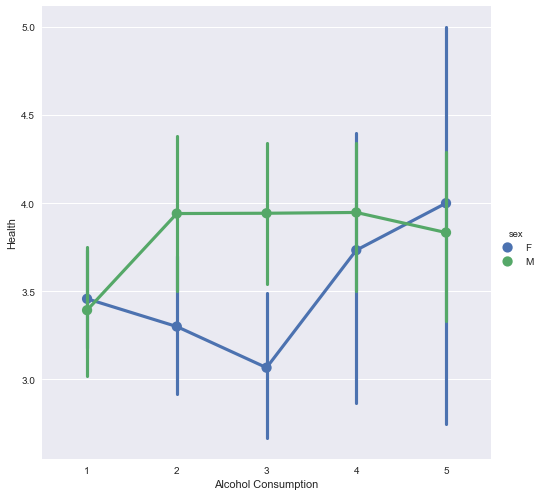

In [15]:
plot1 = sns.factorplot(x="MaxAlc", y="health", hue="sex", data=data, size=7)
plot1.set(ylabel="Health", xlabel="Alcohol Consumption")

## Creating models

#### Importing necessary modules

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.model_selection import cross_val_score

In [17]:
X = data.drop(['AvgGrade'], axis=1)
y = data['AvgGrade']

#### Because we have a lot of categorial features, we need to represent them as integer values to pass it to Regression models
For that purpose we use **get_dummies** Pandas function. Little example will be provided below to show how that method of representing categorial features works. 

In [18]:
# Example
ex = pd.Series(list('abca'))
print(ex)
pd.get_dummies(ex)

0    a
1    b
2    c
3    a
dtype: object


,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [19]:
X = pd.get_dummies(X)

#### Next, we will use 4 regression models to provide prediction
To understand how they work, I will provide little explanation:
**DecisionTreeRegressor** basically tries to build a tree like this:
![DecisionTree](dectree.png)
**Linear Regression** tries to build linear function to predict the target value. Below are example how final model will predict values in case when we have 1 parameter and 1 target value.
![linreg1](linreg1.png)
![linreg2](linreg2.png)
In **Student performance dataset** we have 34 parameters and 1 target value, so at the end we should get equation that looks like $$y = w_0+w_1m_1+w_2m_2+...+w_{34}m_{34}$$

In [20]:
names = ['DecisionTreeRegressor', 'LinearRegression', 'Ridge', 'Lasso']

clf_list = [DecisionTreeRegressor(),
            LinearRegression(),
            Ridge(),
            Lasso()]

In [21]:
# returning R2 value
for name, clf in zip(names, clf_list):
    print(name, end=': ')
    print(cross_val_score(clf, X, y, cv=5).mean())

DecisionTreeRegressor: 0.984380552724
LinearRegression: 1.0
Ridge: 0.999999980998
Lasso: 0.9922201088


**cross_val_score** function returns [$R^2$ coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), which represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It's range between -1 and 1.  
Results that we get is very good. Let's see the importance of each parameter:

In [22]:
tree = DecisionTreeRegressor()
tree.fit(X, y)
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

1. Feature G2 (0.682753)
2. Feature G3 (0.286071)
3. Feature G1 (0.023057)
4. Feature failures (0.003101)
5. Feature absences (0.000941)
6. Feature activities_yes (0.000813)
7. Feature health (0.000330)
8. Feature famrel (0.000319)
9. Feature Mjob_at_home (0.000257)
10. Feature address_U (0.000208)
11. Feature goout (0.000183)
12. Feature Walc (0.000181)
13. Feature Dalc (0.000157)
14. Feature reason_course (0.000152)
15. Feature sex_M (0.000139)
16. Feature MaxAlc (0.000118)
17. Feature famsize_GT3 (0.000110)
18. Feature age (0.000110)
19. Feature studytime (0.000104)
20. Feature sex_F (0.000093)
21. Feature Pstatus_T (0.000084)
22. Feature romantic_no (0.000077)
23. Feature Fedu (0.000074)
24. Feature Mjob_teacher (0.000063)
25. Feature freetime (0.000062)
26. Feature Fjob_services (0.000056)
27. Feature famsup_no (0.000055)
28. Feature Medu (0.000045)
29. Feature paid_no (0.000044)
30. Feature nursery_no (0.000028)
31. Feature school_MS (0.000027)
32. Feature traveltime (0.000026)
3

As you can see, the results of previous tests gives the great impact on prediction. Others are all less that 0.001.  
To see how we can predict target value (average grade on 3 tests) without results of previous exams, we will remove them from our dataset.

In [23]:
data_1g = data.drop(['G1', 'G2', 'G3', 'Dalc', 'Walc'], axis=1)

In [24]:
X_1g = data_1g.drop(['AvgGrade'], axis=1)
y_1g = data_1g['AvgGrade']
X_1g = pd.get_dummies(X_1g)

In [25]:
# returning R2 value
clf_list_1g = [DecisionTreeRegressor(),
            LinearRegression(),
            Ridge(),
            Lasso()]
for name, clf in zip(names, clf_list_1g):
    print(name, end=': ')
    print(cross_val_score(clf, X_1g, y_1g, cv=5).mean())

DecisionTreeRegressor: -0.737414190836
LinearRegression: -6.43813653709e+18
Ridge: 0.0444806550844
Lasso: -0.0274735174589


As we can see, the results are terrible. It showed that without grades of previous tests it is hard to predict average grade.
# Conclusion
The obtained results reveal that it is possible to achieve a high
predictive accuracy, provided that the first and/or second
school period grades are known. However, without them it is hard to do. 